<a href="https://colab.research.google.com/github/AntoninaRemizova/ML/blob/main/ML_class_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт библиотек

In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.neighbors import NearestNeighbors

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/AntoninaRemizova/ML/refs/heads/main/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Пропуски

In [3]:
df.isna().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,201


In [4]:
df.dropna(inplace=True)
df.isna().sum()

,0
id,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0


In [5]:
df.drop(columns='id', inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [6]:
df.age=df.age.astype('int32')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


# one-hot encoding

In [7]:
categ = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease', 'stroke']
num = ['age', 'avg_glucose_level', 'bmi']

In [8]:
df = pd.get_dummies(df, columns=categ, drop_first=True)
df.head()

,age,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,hypertension_1,heart_disease_1,stroke_1
0,67,228.69,36.6,True,False,True,False,True,False,False,True,True,False,False,False,True,True
2,80,105.92,32.5,True,False,True,False,True,False,False,False,False,True,False,False,True,True
3,49,171.23,34.4,False,False,True,False,True,False,False,True,False,False,True,False,False,True
4,79,174.12,24.0,False,False,True,False,False,True,False,False,False,True,False,True,False,True
5,81,186.21,29.0,True,False,True,False,True,False,False,True,True,False,False,False,False,True


# Выбросы

In [9]:
def find_outliers_iqr(df, column):

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    print(f"\nПризнак: {column}")
    print(f"Q1 (25-й перцентиль): {Q1:.2f}")
    print(f"Q3 (75-й перцентиль): {Q3:.2f}")
    print(f"IQR (Межквартильный размах): {IQR:.2f}")
    print(f"Нижняя граница: {lower_bound:.2f}")
    print(f"Верхняя граница: {upper_bound:.2f}")
    print(f"Количество выбросов: {len(outliers)}")

    return outliers

In [10]:
outliers_age = find_outliers_iqr(df, 'age')
outliers_glucose = find_outliers_iqr(df, 'avg_glucose_level')
outliers_bmi = find_outliers_iqr(df, 'bmi')

print(f"\n\nВозраст: {len(outliers_age)} выбросов")
print(f"Уровень глюкозы: {len(outliers_glucose)} выбросов")
print(f"ИМТ: {len(outliers_bmi)} выбросов")


Признак: age
Q1 (25-й перцентиль): 25.00
Q3 (75-й перцентиль): 60.00
IQR (Межквартильный размах): 35.00
Нижняя граница: -27.50
Верхняя граница: 112.50
Количество выбросов: 0

Признак: avg_glucose_level
Q1 (25-й перцентиль): 77.07
Q3 (75-й перцентиль): 113.57
IQR (Межквартильный размах): 36.50
Нижняя граница: 22.32
Верхняя граница: 168.32
Количество выбросов: 567

Признак: bmi
Q1 (25-й перцентиль): 23.50
Q3 (75-й перцентиль): 33.10
IQR (Межквартильный размах): 9.60
Нижняя граница: 9.10
Верхняя граница: 47.50
Количество выбросов: 110


Возраст: 0 выбросов
Уровень глюкозы: 567 выбросов
ИМТ: 110 выбросов


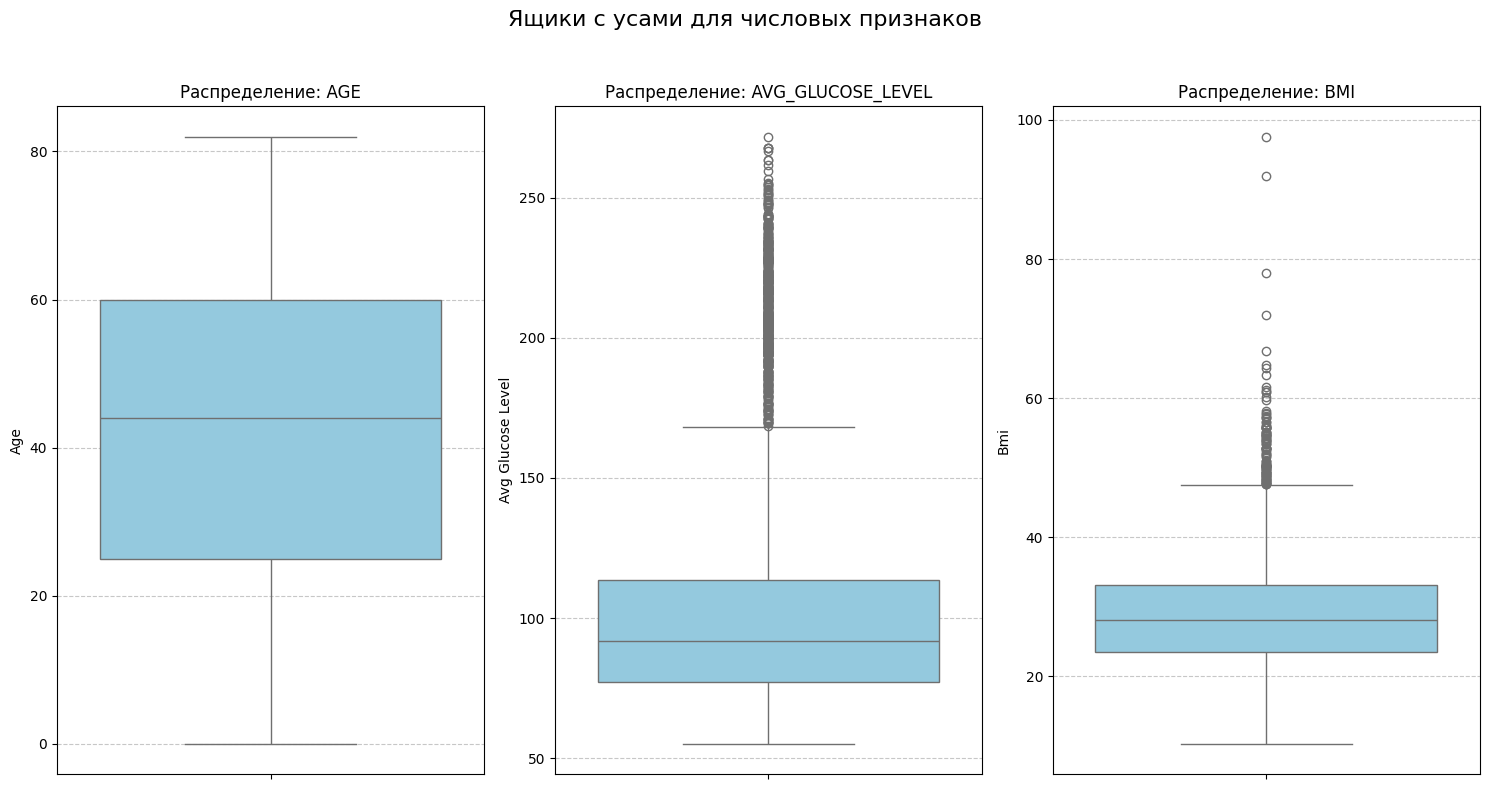

In [23]:
plt.figure(figsize=(15, 8))
plt.suptitle('Ящики с усами для числовых признаков', fontsize=16)


for i, col in enumerate(num):
    plt.subplot(1, 3, i + 1)

    sns.boxplot(y=df[col], color='skyblue')

    plt.title(f'Распределение: {col.upper()}', fontsize=12)
    plt.ylabel(col.replace('_', ' ').title(), fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Стандартизация

In [12]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Кластеризация

## K-means

In [14]:
k_range = range(2, 10)
inertias = []
models = {}

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertias.append(kmeans.inertia_)
    models[k] = kmeans

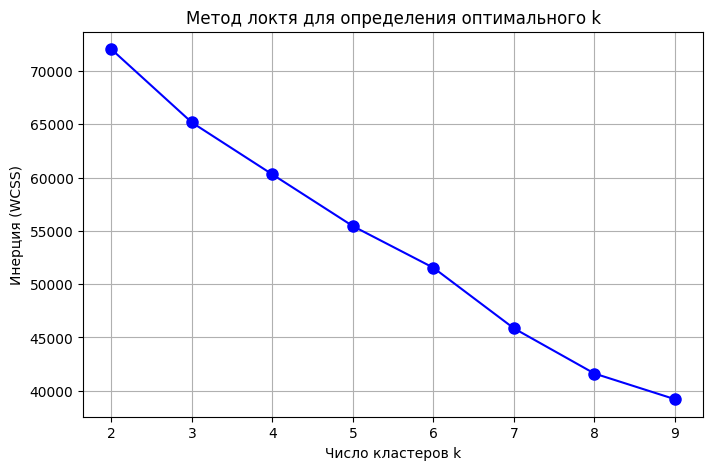

In [16]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, 'bo-', markersize=8)
plt.xlabel('Число кластеров k')
plt.ylabel('Инерция (WCSS)')
plt.title('Метод локтя для определения оптимального k')
plt.grid(True)
plt.show()

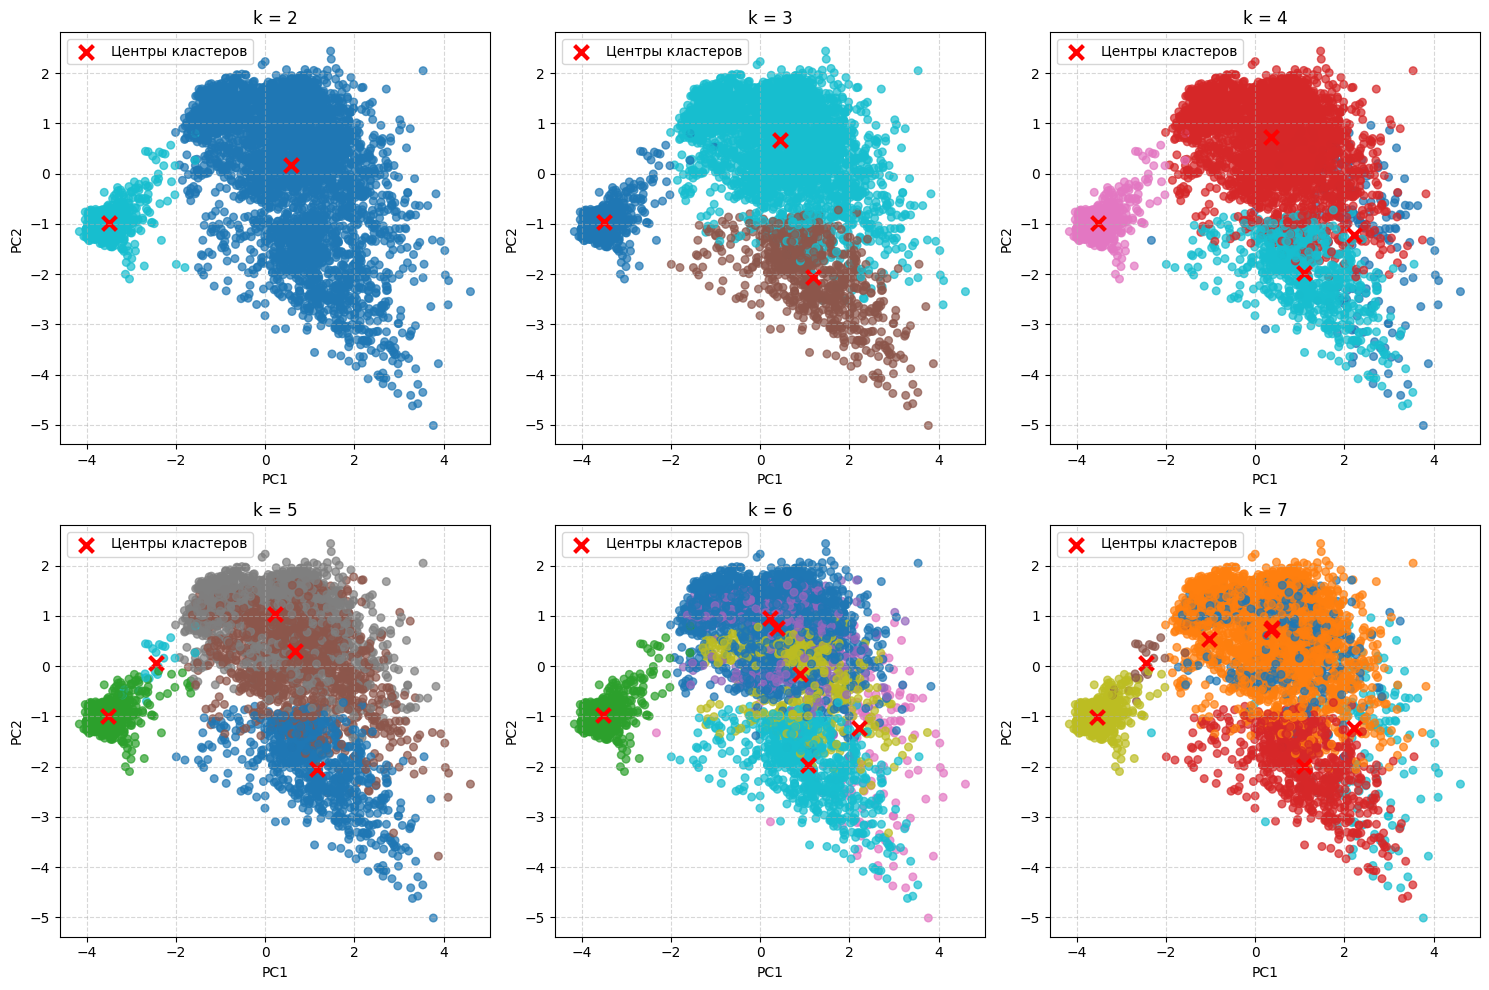

In [22]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_scaled)


k_range = range(2, 8)
plt.figure(figsize=(15, 10))

for i, k in enumerate(k_range):
    kmeans_model = models[k]
    labels = kmeans_model.labels_
    centers = kmeans_model.cluster_centers_


    centers_pca = pca.transform(centers)


    plt.subplot(2, 3, i + 1)
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=30, alpha=0.7)
    plt.scatter(centers_pca[:, 0], centers_pca[:, 1],
                c='red', marker='x', s=100, linewidths=3, label='Центры кластеров')

    plt.title(f'k = {k}')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()

plt.tight_layout()
plt.show()

## DBSCAN

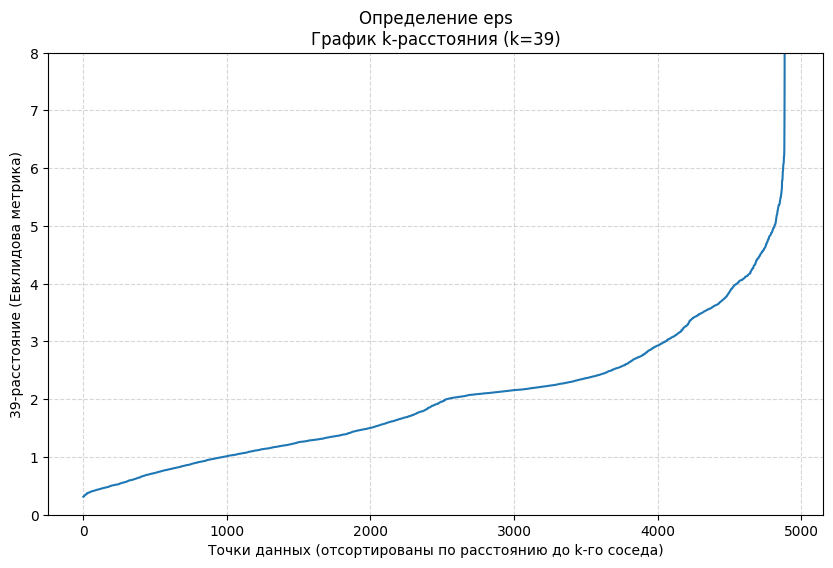

In [38]:
min_points = 40
k = min_points - 1

neigh = NearestNeighbors(n_neighbors=min_points)
distances, indices = neigh.fit(data_scaled).kneighbors(data_scaled)

k_distances = distances[:, k]

k_distances = np.sort(k_distances, axis=0)

plt.figure(figsize=(10, 6))
plt.plot(k_distances)
plt.title(f'Определение eps\nГрафик k-расстояния (k={min_points-1})')
plt.xlabel('Точки данных (отсортированы по расстоянию до k-го соседа)')
plt.ylabel(f'{k}-расстояние (Евклидова метрика)')
plt.grid(True, linestyle='--', alpha=0.5)

plt.ylim(0, 8)
plt.show()

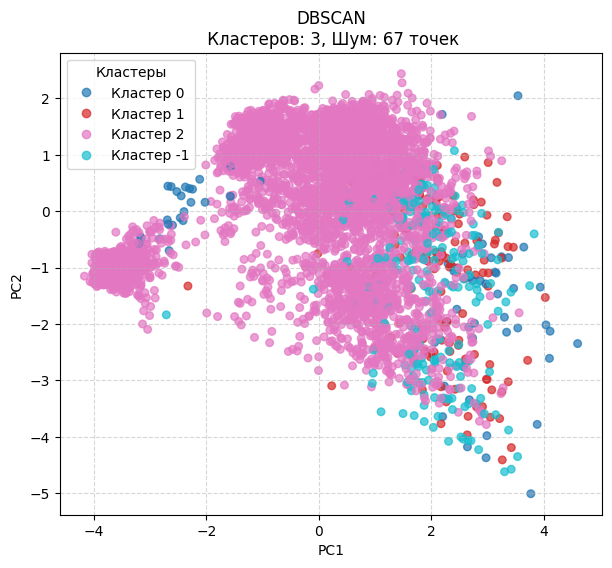

In [59]:
plt.figure(figsize=(7, 6))

dbscan = DBSCAN(eps=4.5, min_samples=40)
dbscan_labels = dbscan.fit_predict(data_scaled)
n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise_dbscan = list(dbscan_labels).count(-1)


scatter_dbscan = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels,
                             cmap='tab10', s=30, alpha=0.7)
plt.title(f'DBSCAN\n Кластеров: {n_clusters_dbscan}, Шум: {n_noise_dbscan} точек')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True, linestyle='--', alpha=0.5)


unique_labels = set(dbscan_labels)

handles, _ = scatter_dbscan.legend_elements()

plt.legend(handles, labels, title='Кластеры')

## Агломеративная иерархическая кластеризация

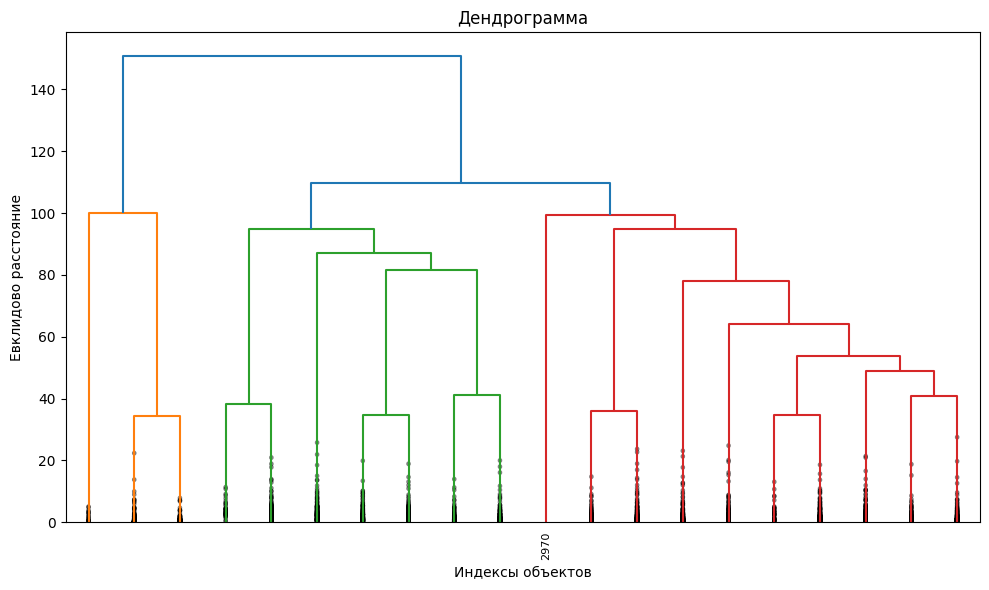

In [52]:
plt.figure(figsize=(10, 6))
plt.title('Дендрограмма')
plt.xlabel('Индексы объектов')
plt.ylabel('Евклидово расстояние')

dendrogram(
    linkage(data_scaled, method='ward'),
    truncate_mode='lastp',
    p=20,
    show_leaf_counts=False,
    leaf_rotation=90.,
    leaf_font_size=8.,
    show_contracted=True,
)

plt.tight_layout()
plt.show()

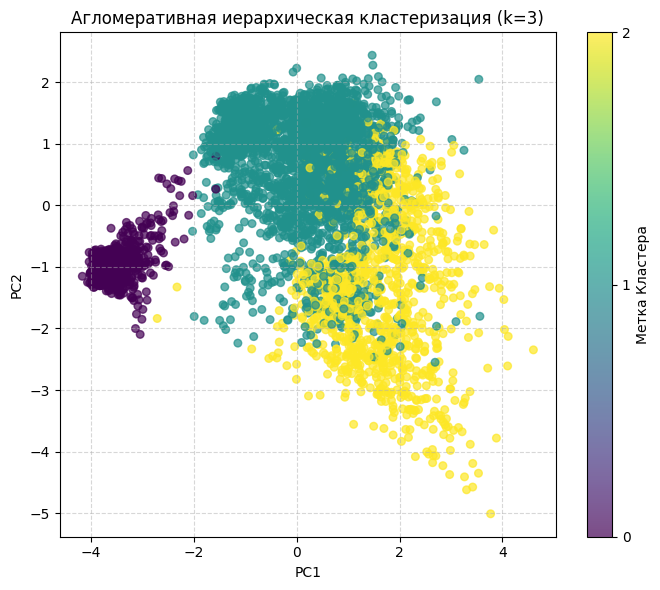

In [60]:
n_clusters_agg = 3
agg_cluster = AgglomerativeClustering(n_clusters=n_clusters_agg, linkage='ward')
agg_labels = agg_cluster.fit_predict(data_scaled)

plt.figure(figsize=(7, 6))
scatter_agg = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agg_labels,
                          cmap='viridis', s=30, alpha=0.7)
plt.title(f'Агломеративная иерархическая кластеризация (k={n_clusters_agg})')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True, linestyle='--', alpha=0.5)
plt.colorbar(scatter_agg, ticks=range(n_clusters_agg), label='Метка Кластера')

plt.tight_layout()
plt.show()